# Neural Network Prediction

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
# read prepared data from previous notebooks
X = pd.read_csv('X.csv', index_col=0)
Y = pd.read_csv('Y.csv', index_col=0)
print(X.shape)
print(Y.shape)

(2985, 885)
(2985, 1)


Visualize X and Y dataset

In [64]:
X.head()

,mol_weight,log_p,num_h_donors,num_h_acceptors,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,311.422,3.3188,1.0,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,299.461,3.2412,1.0,3.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,311.422,3.3188,1.0,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,327.877,3.8331,1.0,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,372.328,3.9422,1.0,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
Y.head()

,pIC50
0,5.301030
1,5.568636
2,5.744727
3,4.958607
4,5.000000


## Building Neural Network

Train Test Split
Splitting the dataset into training and test sets.

In [66]:
# Get 80% of the dataset as the training set. Put the remaining 20% as the test set: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Transpose the dataset
x_train = np.array(x_train.T)
x_test = np.array(x_test.T)
y_train =np.array(y_train.T)
y_test = np.array(y_test.T)

# Every column is one sample of chemical compound with a dimension of 885
# There are in total 2388 training samples
print(x_train.shape)
print(y_train.shape)

(885, 2388)
(1, 2388)


## Defines the input size, hidden size and output size

In [67]:
input_size = 885
hidden_size_1 = 400
hidden_size_2 = 20
output_size = 1

Initialize parameters

In [68]:
def init_param(input_size, hidden_size_1, hidden_size_2, output_size):
    W1 = np.random.randn(hidden_size_1, input_size) * 0.01
    B1 = np.random.randn(hidden_size_1, 1) * 0.01
    W2 = np.random.randn(hidden_size_2, hidden_size_1) * 0.01
    B2 = np.random.randn(hidden_size_2, 1) * 0.01
    W3 = np.random.randn(output_size, hidden_size_2) * 0.01
    B3 = np.random.randn(output_size, 1) * 0.01
    return W1, B1, W2, B2, W3, B3

Define Relu

In [69]:
def ReLU(Z):
    return np.maximum(Z, 0)

## Forward Propagation



In [70]:
def forward_prop(X, W1, B1, W2, B2, W3, B3, dropout_rate = 0.2):
    Z1 = np.dot(W1, X) + B1
    A1 = ReLU(Z1)
    A1 = np.random.binomial(1, 1-dropout_rate, A1.shape) / (1-dropout_rate) * A1
    
    Z2 = np.dot(W2, A1) + B2
    A2 = ReLU(Z2)
    A2 = np.random.binomial(1, 1-dropout_rate, A2.shape) / (1-dropout_rate) * A2
    
    Z3 = np.dot(W3, A2) + B3
    A3 = Z3 # linear activation
    return Z1, A1, Z2, A2, Z3, A3

## Model Dimensions
$$
W1:400*885 \\
X:885*2388 \\
B1:400*1 \\
Z1:400*2388 \\
A1:400*2388 \\
W2:20*400 \\ 
B2: 1*20 \\
Z2: 20*2388 \\ 
A2: 20*2388 \\ 
W3:1*20 \\ 
B3: 1*20 \\
Z3: 1*2388 \\ 
A3: 1*2388 \\ 
Y:1*2388
$$

## Forward Propagation:
$$
Z1 = W1*X + B1
\\
A1 = ReLU(Z1)
\\
A1 = Dropout(A1, rate = p)
\\
Z2 = W2*A1 + B1
\\
A2 = ReLU(Z1)
\\
A2 = Dropout(A2, rate = p)
\\
Z3 = W3*A2 + B2
\\
A3 = Z3
$$

## Loss Function (MSE) and Back Propagation
$$
Loss(A2, Y) = \frac{1}{2*2388} \sum_{i=1}^{2388} (A_2 - Y) ^ 2
$$

Gradients:

$$
dZ_3 = A_3 - Y \\
dW_3 = 1/m dZ_3 * A_2^T \\
dB_3 = 1/m \sum_{i=1}^{2388} dZ_3 \\
dA_2 = W_3^T * dZ_3 \\
dZ_2 = dA_2 * dReLU(Z_2) \\
dW_2 = 1/m dZ_2 * A_1^T \\
dB_2 = 1/m \sum_{i=1}^{2388} dZ_2 \\ 
dA_1 = W_2^T * dZ_2 \\
dZ_1 = dA_1 * dReLU(Z_1) \\
dW_1 = 1/m dZ_1 * X^T \\
dB_1 = 1/m \sum_{i=1}^{2388} dZ_1
$$

## Define derivative of ReLU and back prop

In [71]:
def deriv_ReLU(Z):
    return Z > 0

def back_prop(X, Y, Z1, A1, Z2, A2, Z3, A3, W2, W3):
    m = X.shape[1]
    
    # Output layer gradients
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    dB3 = (1 / m) * np.sum(dZ3)
    
    # Hidden layer 2 gradients
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * deriv_ReLU(Z2)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    dB2 = (1 / m) * np.sum(dZ2)
    
    # Hidden layer 1 gradients
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * deriv_ReLU(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    dB1 = (1 / m) * np.sum(dZ1)
    
    return dW1, dB1, dW2, dB2, dW3, dB3

## Define loss function

In [72]:
def compute_loss(Y, A2):
    m = Y.shape[1]
    loss = (1 / (2 * m)) * np.sum((A2 - Y) ** 2)
    return loss

## Define Gradient descent to update parameters

In [73]:
def update_parameters(W1, B1, W2, B2, W3, B3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate):
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    W3 -= learning_rate * dW3
    B3 -= learning_rate * dB3
    return W1, B1, W2, B2, W3, B3

## Define Training loop

In [74]:
def train(X, Y, learning_rate=0.00001, epochs=1000):
    W1, B1, W2, B2, W3, B3 = init_param(input_size = 885, hidden_size_1 = 400, hidden_size_2 = 20, output_size = 1)
    loss_history = []
    
    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(X, W1, B1, W2, B2, W3, B3)
        loss = compute_loss(Y, A3)
        loss_history.append(loss)
        
        
        dW1, dB1, dW2, dB2, dW3, dB3 = back_prop(X, Y, Z1, A1, Z2, A2, Z3, A3, W2, W3)
        W1, B1, W2, B2, W3, B3 = update_parameters(W1, B1, W2, B2, W3, B3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate)
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    
    return W1, B1, W2, B2, W3, B3, loss_history

## Starts training

In [75]:
trained_W1, trained_B1, trained_W2, trained_B2, trained_W3, trained_B3, loss_history = train(x_train, y_train)

Epoch 0, Loss: 15.749781672555107
Epoch 100, Loss: 15.516972160743888
Epoch 200, Loss: 15.120228409339655
Epoch 300, Loss: 14.31544139737773
Epoch 400, Loss: 12.632550533582624
Epoch 500, Loss: 9.32194769276016
Epoch 600, Loss: 5.092996693733863
Epoch 700, Loss: 2.9699345970907993
Epoch 800, Loss: 2.883841191174643
Epoch 900, Loss: 2.697174078803353


## Visualize the training loss

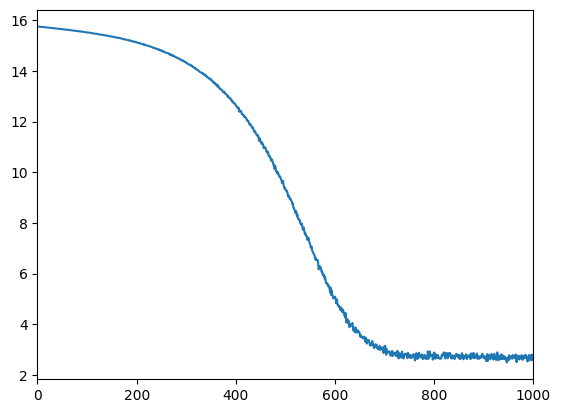

In [76]:
plt.xlim(0, 1000)
plt.plot(loss_history)

## With 1000 epoch of training, the loss on the training set is calculated

Test the model on the test set

In [77]:
_, _, _, _, _, predicted_A3 = forward_prop(x_test, trained_W1, trained_B1, trained_W2, trained_B2, trained_W3, trained_B3)
print(f"Prediction : {predicted_A3[0][:50]}")
print(f"Actual: {y_test[0][:50]}")
loss = compute_loss(y_test, predicted_A3)
print(f"loss : {loss}")

Prediction : [ 0.89594327  5.58623029  3.59209531  4.31951548  5.69051882  2.76035039
  2.5353128   6.0048081   2.43337229  6.13105806 10.73172703  7.77346572
  7.9278016   3.26825889  8.88118682  8.22331554  0.9361306   3.87243344
  4.895225    6.06005474  5.67628086  5.69287038  2.91398574  2.12189286
  6.22866145  4.26923474  6.20671574  3.28576474  6.3770232   5.22762875
  5.38104897  5.4180146   2.33585498  5.92159131  4.2799627   3.60458977
  3.8518362   8.22229575  5.65697199  4.11229039  5.02056277  3.77990936
  1.92850869  6.97051274  4.15374138  5.87813939  1.17617657  8.17494015
  5.54148848  3.85221471]
Actual: [6.32239305 5.         4.82073554 6.20065945 5.48148606 5.04575749
 4.70114692 4.72746222 5.08249449 8.52287875 5.52287875 4.61618463
 5.07572071 4.92481815 8.55284197 4.39794001 4.82102305 4.00674017
 5.95860731 5.46852108 5.1948391  4.78914663 5.         4.09151498
 4.85387196 4.2756422  4.69897    7.25289907 6.09691001 4.66134433
 4.69897    5.         4.73873713 

## Results

With 597 samples in the test set, the total loss is around 1.2.

## Plot the actual value vs the predicted value

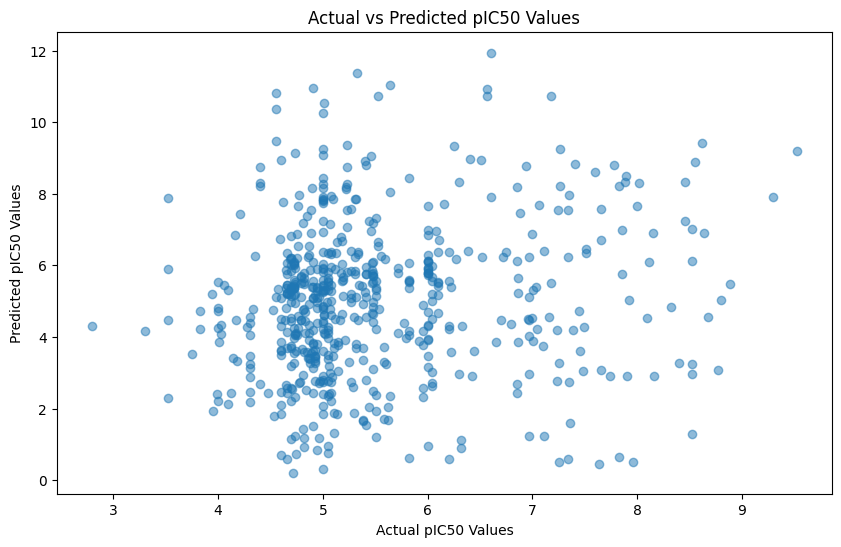

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_A3, alpha=0.5)
plt.xlabel('Actual pIC50 Values')
plt.ylabel('Predicted pIC50 Values')
plt.title('Actual vs Predicted pIC50 Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of equality
plt.show()